In [1]:
import matplotlib
import osmnx as ox
import geopandas as gpd
import traceback
import os.path
from typing import Tuple

# osmnx.graph.graph_from_polygon #
osmnx.graph.graph_from_polygon( </br>
&nbsp; &nbsp; &nbsp;polygon, </br>
&nbsp; &nbsp; &nbsp;network_type='all', </br>
&nbsp; &nbsp; &nbsp;simplify=True, </br>
&nbsp; &nbsp; &nbsp;retain_all=False, </br>
&nbsp; &nbsp; &nbsp;truncate_by_edge=False, </br>
&nbsp; &nbsp; &nbsp;clean_periphery=None, </br>
&nbsp; &nbsp; &nbsp;custom_filter=None </br>
**)**</br>
Загружает и создает граф в границах полигона или мультиполигона.
##### ПАРАМЕТРЫ:
* **polygon** (shapely.geometry.Polygon or shapely.geometry.MultiPolygon) – форма, в которой будут храниться сетевые данные. Координаты должны быть указаны в градусах широты и долготы в проекции EPSG:4326
* **network_type** (string {"all", "all_public", "bike", "drive", "drive_service", "walk"}) – какой тип уличной сети необходимо получить, если значение custom_filter равно None
* **simplify** (bool) – если значение равно True, упрощает топологию графа с помощью функции simplify_graph
* **retain_all** (bool) – если значение равно True, вернет весь график, даже если он не связан. в противном случае сохранит только самый большой слабосвязный компонент.
* **truncate_by_edge** (bool) – если значение равно True, узлы сохраняются за пределами граничного полигона, если хотя бы один из соседних узлов находится внутри полигона
* **custom_filter** (string) – a custom ways filter to be used instead of the network_type presets e.g. Also pass in a network_type that is in settings.bidirectional_network_types if you want graph to be fully bi-directional.
пользовательский фильтр ways, который будет использоваться вместо настроек network_type, например, также укажите network_type, который находится в settings.bidirectional_network_types, если вы хотите, чтобы график был полностью двунаправленным.
##### ВОЗВРАЩАЕМОЕ ЗНАЧЕНИЕ:
* G - networkx.MultiDiGraph


# osmnx.distance.nearest_nodes #
osmnx.distance.nearest_nodes(</br>
&nbsp;&nbsp;&nbsp;G, </br>
&nbsp;&nbsp;&nbsp;X, </br>
&nbsp;&nbsp;&nbsp;Y, </br>
&nbsp;&nbsp;&nbsp;return_dist=False </br>
**)** </br>
Ищет ближайший узел к точку или к каждой из нескольких точек
Если X и Y являются единичными значениями координат, то будет возвращен ближайший узел к этой точке. Если X и Y являются списками значений координат, то будет возвращен ближайший узел к каждой точке.
Если граф проецируется, то для евклидова поиска ближайшего соседа используется дерево k-d, для чего требуется, чтобы scipy был установлен в качестве необязательной зависимости. Если он не запроектирован, то для поиска ближайшего соседа в haversine используется шаровое дерево, для чего требуется, чтобы scikit-learn был установлен в качестве необязательной зависимости.
##### ПАРАМЕТРЫ:
* **G** (networkx.MultiDiGraph) – график, на котором можно найти ближайшие узлы
* **X** (float или list) – координаты точек по x (долготе), выраженные в тех же единицах измерения, что и на графике, и не содержащие нулей
* **Y** (float или list) – координаты точек по y (широте), выраженные в тех же единицах измерения, что и на графике, и не содержащие нулей
* **return_dist** (bool) – необязательный параметр, указывает возвращать или нет расстояние между точками и ближайшими узлами
##### ВОЗВРАЩАЕМОЕ ЗНАЧЕНИЕ:
* **nn** или **(nn, dist)** (int/list or tuple) – идентификаторы ближайших узлов или, необязательно, кортеж, где dist содержит расстояния между точками и их ближайшими узлами


# osmnx.distance.shortest_path #
osmnx.distance.shortest_path( </br>
&nbsp;&nbsp;&nbsp;G,</br>
&nbsp;&nbsp;&nbsp;orig,</br>
&nbsp;&nbsp;&nbsp;dest,</br>
&nbsp;&nbsp;&nbsp;weight='length',</br>
&nbsp;&nbsp;&nbsp;cpus=1 </br>
**)**</br>
Расчитывает кратчайшее расстояние между точками
##### ПАРАМЕТРЫ:
* **G** (networkx.MultiDiGraph) – входной граф
* **orig** (int или list) – идентификатор исходного узла или список идентификаторов исходного узла
* **dest** (int или list) – идентификатор узла назначения или список идентификаторов узлов назначения
* **weight** (string) – атрибут ребра, который необходимо минимизировать при решении задачи поиска кратчайшего пути
* **cpus** (int) – количество используемых ядер CPU если равно None - использует все доступные
##### ВОЗВРАЩАЕМОЕ ЗНАЧЕНИЕ:
* **path** (list)– список идентификаторов узлов, составляющих кратчайший путь, или, если orig и dest являются списками, то список списков путей


# osmnx.graph.graph_from_polygon #
osmnx.graph.graph_from_polygon( </br>
&nbsp;&nbsp;&nbsp;polygon,</br>
&nbsp;&nbsp;&nbsp;network_type='all',</br>
&nbsp;&nbsp;&nbsp;simplify=True,</br>
&nbsp;&nbsp;&nbsp;retain_all=False,</br>
&nbsp;&nbsp;&nbsp;truncate_by_edge=False,</br>
&nbsp;&nbsp;&nbsp;clean_periphery=None,</br>
&nbsp;&nbsp;&nbsp;custom_filter=None</br>
)</br>
Загружает и создает граф с границами полигона или мультиполигона
##### ПАРАМЕТРЫ:
* **polygon** (shapely.geometry.Polygon or shapely.geometry.MultiPolygon) – the shape to get network data within. coordinates should be in unprojected latitude-longitude degrees (EPSG:4326).
* **network_type** (string {"all", "all_public", "bike", "drive", "drive_service", "walk"}) – what type of street network to get if custom_filter is None
* **simplify** (bool) – if True, simplify graph topology with the simplify_graph function
* **retain_all** (bool) – if True, return the entire graph even if it is not connected. otherwise, retain only the largest weakly connected component.
* **truncate_by_edge** (bool) – if True, retain nodes outside boundary polygon if at least one of node’s neighbors is within the polygon
* **clean_periphery** (bool) – deprecated, do not use
* **custom_filter** (string) – a custom ways filter to be used instead of the network_type presets e.g., ‘[“power”~”line”]’ or ‘[“highway”~”motorway|trunk”]’. Also pass in a network_type that is in settings.bidirectional_network_types if you want graph to be fully bi-directional.
##### ВОЗВРАЩАЕМОЕ ЗНАЧЕНИЕ:
* **G** (networkx.MultiDiGraph)


# osmnx.plot.plot_graph #
osmnx.plot.plot_graph(</br>
&nbsp;&nbsp;&nbsp;G,</br>
&nbsp;&nbsp;&nbsp;ax=None,</br>
&nbsp;&nbsp;&nbsp;figsize=(8, 8),</br>
&nbsp;&nbsp;&nbsp;bgcolor='#111111',</br>
&nbsp;&nbsp;&nbsp;node_color='w',</br>
&nbsp;&nbsp;&nbsp;node_size=15,</br>
&nbsp;&nbsp;&nbsp;node_alpha=None,</br>
&nbsp;&nbsp;&nbsp;node_edgecolor='none',</br>
&nbsp;&nbsp;&nbsp;node_zorder=1,</br>
&nbsp;&nbsp;&nbsp;edge_color='#999999',</br>
&nbsp;&nbsp;&nbsp;edge_linewidth=1,</br>
&nbsp;&nbsp;&nbsp;edge_alpha=None,</br>
&nbsp;&nbsp;&nbsp;show=True,</br>
&nbsp;&nbsp;&nbsp;close=False,</br>
&nbsp;&nbsp;&nbsp;save=False,</br>
&nbsp;&nbsp;&nbsp;filepath=None,</br>
&nbsp;&nbsp;&nbsp;dpi=300,</br>
&nbsp;&nbsp;&nbsp;bbox=None</br>
)
Рисует граф
##### ПАРАМЕТРЫ:
* **G** (networkx.MultiDiGraph) – input graph
* **ax** (matplotlib axis) – if not None, plot on this preexisting axis
* **figsize** (tuple) – if ax is None, create new figure with size (width, height)
* **bgcolor** (string) – background color of plot
* **node_color** (string or list) – color(s) of the nodes
* **node_size** (int) – size of the nodes: if 0, then skip plotting the nodes
* **node_alpha** (float) – opacity of the nodes, note: if you passed RGBA values to node_color, set node_alpha=None to use the alpha channel in node_color
* **node_edgecolor** (string) – color of the nodes’ markers’ borders
* **node_zorder** (int) – zorder to plot nodes: edges are always 1, so set node_zorder=0 to plot nodes below edges
* **edge_color** (string or list) – color(s) of the edges’ lines
* **edge_linewidth** (float) – width of the edges’ lines: if 0, then skip plotting the edges
* **edge_alpha** (float) – opacity of the edges, note: if you passed RGBA values to edge_color, set edge_alpha=None to use the alpha channel in edge_color
* **show** (bool) – if True, call pyplot.show() to show the figure
* **close** (bool) – if True, call pyplot.close() to close the figure
* **save** (bool) – if True, save the figure to disk at filepath
* **filepath** (string) – if save is True, the path to the file. file format determined from extension. if None, use settings.imgs_folder/image.png
* **dpi** (int) – if save is True, the resolution of saved file
* **bbox** (tuple) – bounding box as (north, south, east, west). if None, will calculate from spatial extents of plotted geometries.
##### ВОЗВРАЩАЕМОЕ ЗНАЧЕНИЕ:
**fig**, **ax** tuple – matplotlib figure, axis


osmnx.plot.plot_graph_route(</br>
&nbsp;&nbsp;&nbsp;G,</br>
&nbsp;&nbsp;&nbsp;route,</br>
&nbsp;&nbsp;&nbsp;route_color='r',</br>
&nbsp;&nbsp;&nbsp;route_linewidth=4,</br>
&nbsp;&nbsp;&nbsp;route_alpha=0.5,</br>
&nbsp;&nbsp;&nbsp;orig_dest_size=100,</br>
&nbsp;&nbsp;&nbsp;ax=None, **pg_kwargs</br>
**)**</br>
Визуализация маршрута на графе
##### ПАРАМЕТРЫ:
* **G** (networkx.MultiDiGraph) – input graph
* **route** (list) – route as a list of node IDs
* **route_color** (string) – color of the route
* **route_linewidth** (int) – width of the route line
* **route_alpha** (float) – opacity of the route line
* **orig_dest_size** (int) – size of the origin and destination nodes
* **ax** (matplotlib axis) – if not None, plot route on this preexisting axis instead of creating a new fig, ax and drawing the underlying graph
* **pg_kwargs** – keyword arguments to pass to plot_graph
##### ВОЗВРАЩАЕМОЕ ЗНАЧЕНИЕ:
**fig**, **ax** (tuple) – matplotlib figure, axis


# osmnx.plot.plot_graph_routes #
osmnx.plot.plot_graph_routes( </br>
&nbsp;&nbsp;&nbsp;G,</br>
&nbsp;&nbsp;&nbsp;routes,</br>
&nbsp;&nbsp;&nbsp;route_colors='r',</br>
&nbsp;&nbsp;&nbsp;route_linewidths=4,</br>
&nbsp;&nbsp;&nbsp;**pgr_kwargs</br>
)</br>
Рисует нисколько маршрутов на графе
##### ПАРАМЕТРЫ:
* **G** (networkx.MultiDiGraph) – input graph
* **routes** (list) – routes as a list of lists of node IDs
* **route_colors** (string or list) – if string, 1 color for all routes. if list, the colors for each route.
* **route_linewidths** (int or list) – if int, 1 linewidth for all routes. if list, the linewidth for each route.
* **pgr_kwargs** – keyword arguments to pass to plot_graph_route
##### ВОЗВРАЩАЕМОЕ ЗНАЧЕНИЕ:
**fig**, **ax** (tuple) – matplotlib figure, axis


In [2]:
class OSMNX:
    def __init__(self, polygon_path):
        try:
            if os.path.exists(polygon_path):
                polygon = gpd.read_file(polygon_path)
                ox.settings.log_console = True
                ox.settings.use_cache = True
                area = polygon["geometry"].iloc[0]
                self.graph = ox.graph_from_polygon(area, network_type="drive")
            else:
                raise FileNotFoundError
        except FileNotFoundError:
            print(f'Файл по пути {polygon_path} не найден')
        except NameError:
            print('Произошла ошибка, проверьте')
    
    #osmnx.distance.great_circle(lat1, lon1, lat2, lon2, earth_radius=6371009)
    def draw_graph(self):
        ox.plot_graph(self.graph)
    
    def search_shortest_path(
        self,
        latlng1: Tuple[float,float],
        latlng2: Tuple[float,float]
    ):
        try:
            latlng1 = list(reversed(latlng1))
            latlng2 = list(reversed(latlng2))
            start_point_node = ox.distance.nearest_nodes(
                self.graph,
                *latlng1
            )
            finish_point_node = ox.distance.nearest_nodes(
                self.graph,
                *latlng2
            )
            #osmnx.distance.shortest_path(G, orig, dest, weight='length', cpus=1)
            shortest_route = ox.shortest_path(
                self.graph,
                start_point_node,
                finish_point_node
            )
            return shortest_route
        except:
            print(f'Произошла ошибка {traceback.format_exc()}')
    
    def draw_shortest_route(self, route):
        try:
            fig, ax = ox.plot_graph_route(
                self.graph,
                route,
                route_color = "c",
                node_size = 0
            )
        except:
            print(f'Произошла ошибка {traceback.format_exc()}')
        
    def save_graph(self, filepath):
        try:
            ox.save_graph_shapefile(self.graph, filepath)
        except:
            print(f'Произошла ошибка\n{traceback.format_exc()}')

In [3]:
osmnx_obj = OSMNX('POLYGON.shp')

In [4]:
origin = (55.727986,37.707327)
destination = (55.811974,37.594830)
shortest_route = osmnx_obj.search_shortest_path(origin, destination)

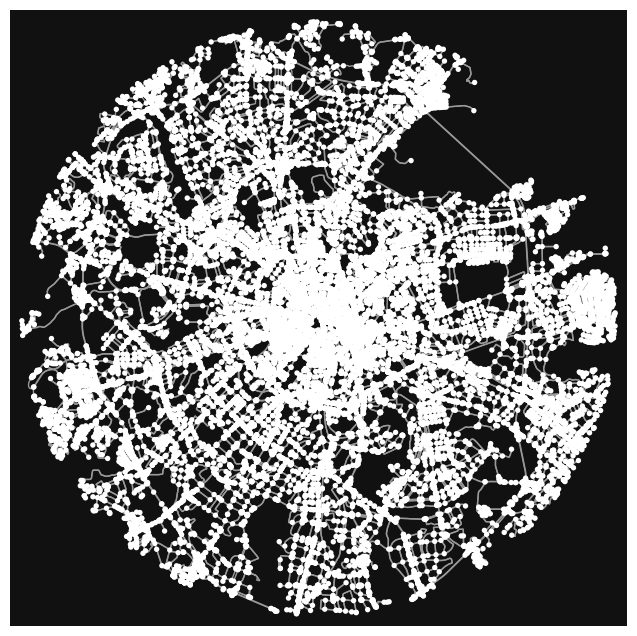

In [5]:
osmnx_obj.draw_graph()

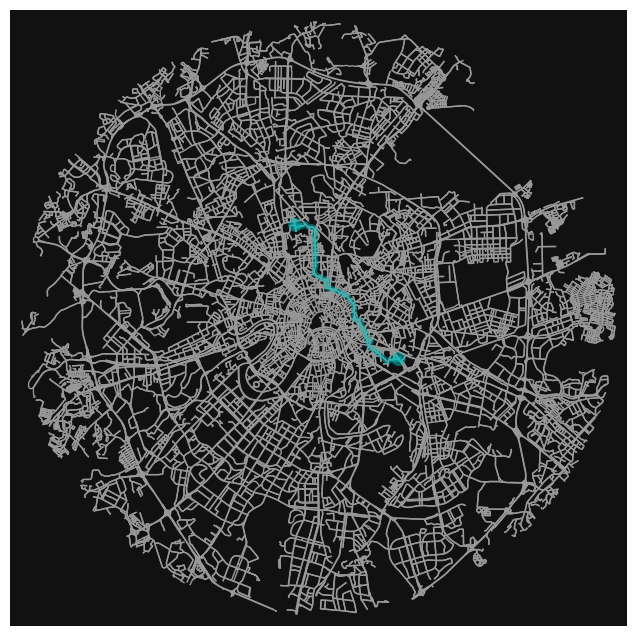

In [6]:
osmnx_obj.draw_shortest_route(shortest_route)

In [7]:
osmnx_obj.save_graph('result')

/tmp/ipykernel_1814/1708649431.py:60: FutureWarning: The `save_graph_shapefile` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `save_graph_geopackage` function to save graphs as GeoPackage files for subsequent GIS analysis. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  ox.save_graph_shapefile(self.graph, filepath)
/home/bro/.local/lib/python3.10/site-packages/osmnx/io.py:115: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)
/home/bro/.local/lib/python3.10/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'street_count' to 'street_cou'
  ogr_write(
/home/bro/.local/lib/python3.10/site-packages/pyogrio/raw.py:709: RuntimeWarning: Value '[1153126531, 1153126532, 1153126921, 1153126431, 1153126432, 153809701, 1153126824, 1153126825, 1153121457, 11